<a href="https://colab.research.google.com/github/CEMPAplicaciones/MIA/blob/main/Modulo_2/2_3_4_Modelado_y_evaluaci%C3%B3n_de_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelado y métricas de desempeño

In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console
console = Console()

# Configuración para visualizaciones
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")

In [3]:
# Vamos a trabajar con el conjuto de datos de diabetes de Scikit-learn
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convertir el objetivo en un problema de clasificación binaria
# Consideraremos que un valor por encima de la mediana es "diabetes positivo"
y_binary = (y > np.median(y)).astype(int)

# Crear un DataFrame con nombres de características
feature_names = diabetes.feature_names
data = pd.DataFrame(X, columns=feature_names)
data['diabetes'] = y_binary

📊 Generando 10 boxplots en diseño 5x2


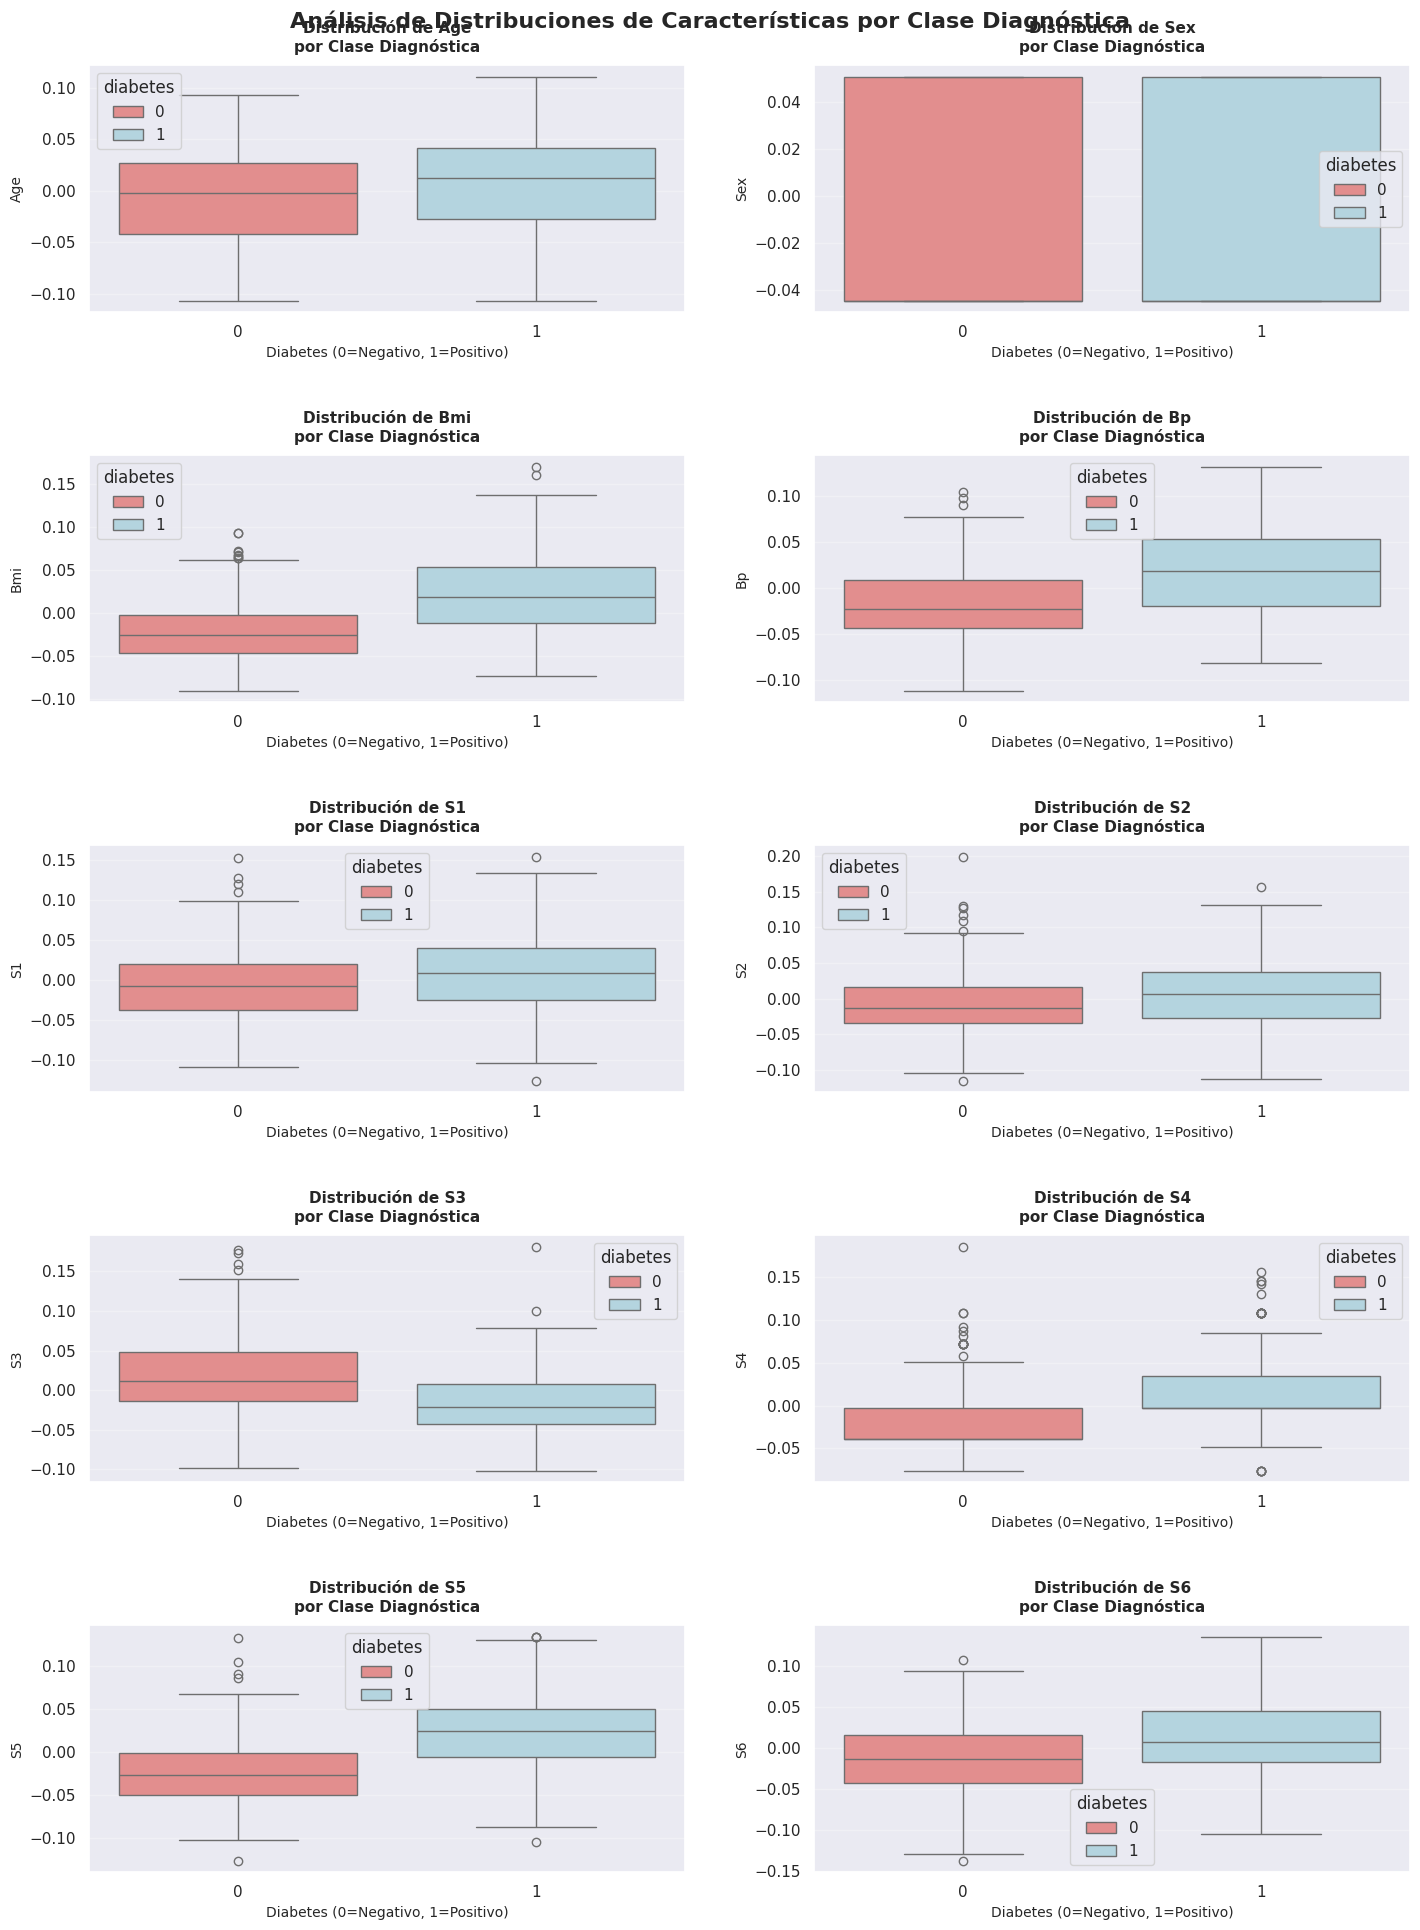

In [6]:
# Crear una figura con subplots para los boxplots
plt.figure(figsize=(15, 20))

# Configuración del diseño de subplots
n_features = len(feature_names)
rows = (n_features + 1) // 2  # Calcular número de filas necesarias
cols = 2

print(f"📊 Generando {n_features} boxplots en diseño {rows}x{cols}")

# Crear boxplots para cada característica
for i, feature in enumerate(feature_names, 1):
    plt.subplot(rows, cols, i)

    # Generar boxplot con paleta de colores mejorada
    sns.boxplot(x='diabetes', y=feature, data=data,
                palette=['lightcoral', 'lightblue'],
                hue='diabetes',
                showfliers=True)

    # Personalizar título y etiquetas
    plt.title(f'Distribución de {feature.replace("_", " ").title()}\npor Clase Diagnóstica',
              fontsize=11, fontweight='bold', pad=10)
    plt.xlabel('Diabetes (0=Negativo, 1=Positivo)', fontsize=10)
    plt.ylabel(f'{feature.replace("_", " ").title()}', fontsize=10)

    # Añadir grilla sutil para mejor legibilidad
    plt.grid(True, alpha=0.3, axis='y')

# Ajustar espaciado entre subplots y añadir título general
plt.tight_layout(pad=3.0)
plt.suptitle('Análisis de Distribuciones de Características por Clase Diagnóstica',
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

DATA:           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6      diabetes  
0   -0.002592  0.01

/tmp/ipython-input-18-2492015215.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   • Clase 0 (Negativo): {class_balance[0]:.1f}%")
/tmp/ipython-input-18-2492015215.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   • Clase 1 (Positivo): {class_balance[1]:.1f}%")
/tmp/ipython-input-18-2492015215.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"   • Ratio de balance: {class_balance[0]/class_balance[

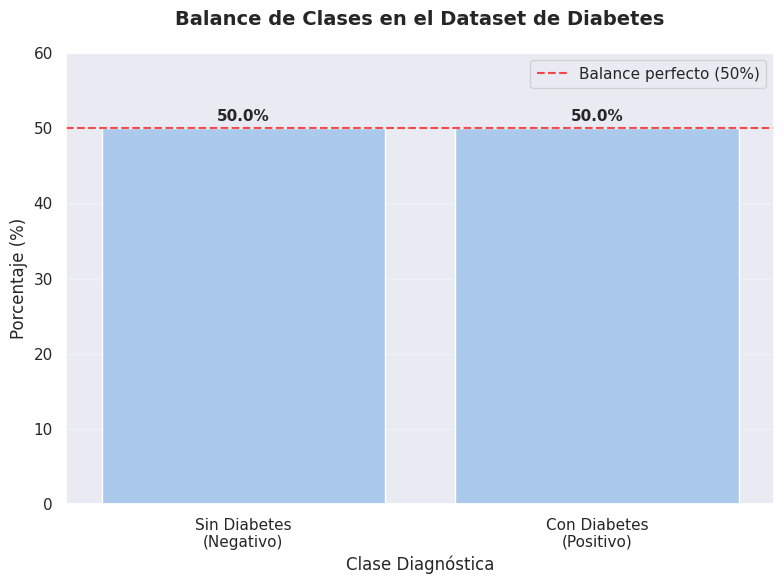


📈 EVALUACIÓN DEL BALANCE: ✅ Bien balanceado
   • Ratio de balance: 1.00


In [18]:
# Mostrar el balance de clases
class_balance = data['diabetes'].value_counts(normalize=True) * 100

print("DATA:", data)

print("📊 ANÁLISIS DE BALANCE DE CLASES")
print(f"   • Clase 0 (Negativo): {class_balance[0]:.1f}%")
print(f"   • Clase 1 (Positivo): {class_balance[1]:.1f}%")
print(f"   • Ratio de balance: {class_balance[0]/class_balance[1]:.2f}:1")

# Crear gráfico de balance de clases
plt.figure(figsize=(8, 6))

# Generar barplot con colores diferenciados
bars = sns.barplot(x=class_balance.index, y=class_balance.values)

# Personalizar el gráfico
plt.title('Balance de Clases en el Dataset de Diabetes',
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Clase Diagnóstica', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Configurar etiquetas del eje X más descriptivas
plt.xticks([0, 1], ['Sin Diabetes\n(Negativo)', 'Con Diabetes\n(Positivo)'])

# Añadir etiquetas de porcentaje sobre las barras
for i, v in enumerate(class_balance.values):
   plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Añadir línea horizontal para referencia de balance perfecto (50%)
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Balance perfecto (50%)')

# Configurar límites del eje Y y añadir grilla
plt.ylim(0, max(class_balance.values) + 10)
plt.grid(True, alpha=0.3, axis='y')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el grado de desbalance
balance_ratio = min(class_balance.values) / max(class_balance.values)
if balance_ratio > 0.8:
   balance_status = "✅ Bien balanceado"
elif balance_ratio > 0.6:
   balance_status = "⚠️ Ligeramente desbalanceado"
else:
   balance_status = "🚨 Significativamente desbalanceado"

print(f"\n📈 EVALUACIÓN DEL BALANCE: {balance_status}")
print(f"   • Ratio de balance: {balance_ratio:.2f}")

In [ ]:
# Imprimir estadísticas del balance de clases
print("\nEstadísticas del balance de clases:")
print(f"Clase 0 (Negativo): {class_balance[0]:.1f}%")
print(f"Clase 1 (Positivo): {class_balance[1]:.1f}%")

# Calcular y mostrar estadísticas descriptivas por clase
print("\nEstadísticas descriptivas por clase:")
for feature in feature_names:
    console.rule(f"{feature.upper()}")
    print(data.groupby('diabetes')[feature].describe())


Estadísticas del balance de clases:
Clase 0 (Negativo): 50.0%
Clase 1 (Positivo): 50.0%

Estadísticas descriptivas por clase:


─────────────────────────────────────────────────────── AGE ───────────────────────────────────────────────────────

          count      mean       std       min      25%       50%       75%  \
diabetes                                                                     
0         221.0 -0.007503  0.046964 -0.107226 -0.04184 -0.001882  0.027178   
1         221.0  0.007503  0.047189 -0.107226 -0.02731  0.012648  0.041708   

               max  
diabetes            
0         0.092564  
1         0.110727  


─────────────────────────────────────────────────────── SEX ───────────────────────────────────────────────────────

          count      mean       std       min       25%       50%      75%  \
diabetes                                                                     
0         221.0 -0.000216  0.047659 -0.044642 -0.044642 -0.044642  0.05068   
1         221.0  0.000216  0.047686 -0.044642 -0.044642 -0.044642  0.05068   

              max  
diabetes           
0         0.05068  
1         0.05068  


─────────────────────────────────────────────────────── BMI ───────────────────────────────────────────────────────

          count     mean       std       min       25%       50%       75%  \
diabetes                                                                     
0         221.0 -0.02191  0.037701 -0.090275 -0.046085 -0.025607 -0.001895   
1         221.0  0.02191  0.046472 -0.073030 -0.011595  0.018584  0.054152   

               max  
diabetes            
0         0.092953  
1         0.170555  


─────────────────────────────────────────────────────── BP ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.017406  0.041099 -0.112399 -0.043542 -0.022885  0.008101   
1         221.0  0.017406  0.047409 -0.081413 -0.019442  0.018430  0.052858   

               max  
diabetes            
0         0.104501  
1         0.132044  


─────────────────────────────────────────────────────── S1 ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%      75%  \
diabetes                                                                     
0         221.0 -0.007652  0.045817 -0.108893 -0.037344 -0.008449  0.01907   
1         221.0  0.007652  0.048256 -0.126781 -0.024960  0.008063  0.03971   

               max  
diabetes            
0         0.152538  
1         0.153914  


─────────────────────────────────────────────────────── S2 ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.006495  0.047133 -0.115613 -0.034508 -0.012900  0.016222   
1         221.0  0.006495  0.047320 -0.112795 -0.027305  0.006202  0.037830   

               max  
diabetes            
0         0.198788  
1         0.155887  


─────────────────────────────────────────────────────── S3 ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0  0.016497  0.049510 -0.098625 -0.013948  0.011824  0.048640   
1         221.0 -0.016497  0.039338 -0.102307 -0.043401 -0.021311  0.008142   

               max  
diabetes            
0         0.177497  
1         0.181179  


─────────────────────────────────────────────────────── S4 ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.016897  0.042269 -0.076395 -0.039493 -0.039493 -0.002592   
1         221.0  0.016897  0.046746 -0.076395 -0.002592 -0.002592  0.034309   

               max  
diabetes            
0         0.185234  
1         0.155345  


─────────────────────────────────────────────────────── S5 ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.022558  0.040174 -0.126097 -0.049872 -0.025953 -0.000612   
1         221.0  0.022558  0.043694 -0.104366 -0.005142  0.024730  0.049770   

               max  
diabetes            
0         0.132376  
1         0.133597  


─────────────────────────────────────────────────────── S6 ────────────────────────────────────────────────────────

          count      mean       std       min       25%       50%       75%  \
diabetes                                                                      
0         221.0 -0.013804  0.042942 -0.137767 -0.042499 -0.013504  0.015491   
1         221.0  0.013804  0.048152 -0.104630 -0.017646  0.007207  0.044485   

               max  
diabetes            
0         0.106617  
1         0.135612  


Forma de los conjuntos de datos:
 - X_train: (353, 10)
 - X_test: (89, 10)
 - y_train: (353,)
 - y_test: (89,)


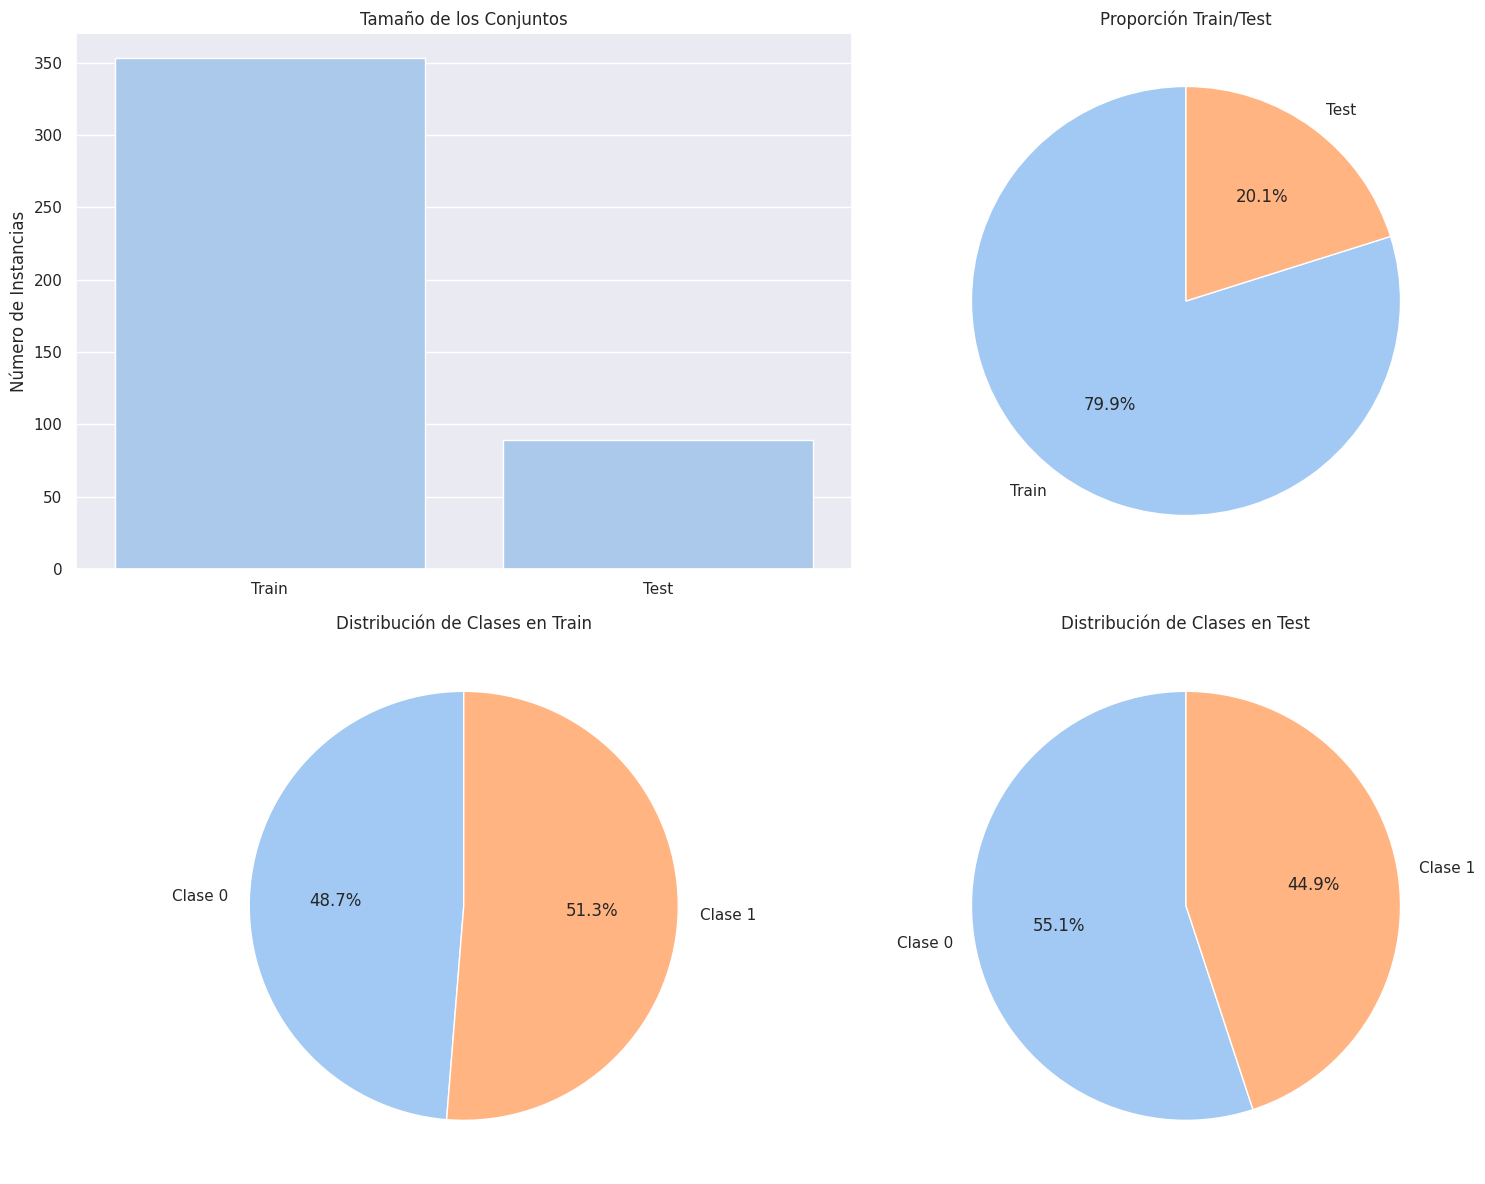


Estadísticas:
Ratio Train/Test: 0.80

Distribución de Clases:
Clase 0:
 - Train: 172 (48.7%)
 - Test: 49 (55.1%)
Clase 1:
 - Train: 181 (51.3%)
 - Test: 40 (44.9%)


In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def visualize_train_test_split(X_train, X_test, y_train, y_test):
    """
    Visualiza la distribución de los conjuntos de entrenamiento y prueba,
    incluyendo el tamaño de los conjuntos y la distribución de clases.

    Args:
    X_train, X_test, y_train, y_test: Conjuntos de datos divididos
    """
    plt.figure(figsize=(16, 12))

    # Información textual
    print("Forma de los conjuntos de datos:")
    print(f" - X_train: {X_train.shape}")
    print(f" - X_test: {X_test.shape}")
    print(f" - y_train: {y_train.shape}")
    print(f" - y_test: {y_test.shape}")

    # Tamaño de los conjuntos
    sizes = {
        'Train': X_train.shape[0],
        'Test': X_test.shape[0]
    }

    # Distribución de clases
    train_class_dist = np.bincount(y_train)
    test_class_dist = np.bincount(y_test)

    # Gráfico de barras para el tamaño de los conjuntos
    plt.subplot(2, 2, 1)
    sns.barplot(x=list(sizes.keys()), y=list(sizes.values()))
    plt.title('Tamaño de los Conjuntos')
    plt.ylabel('Número de Instancias')

    # Gráfico circular para la proporción Train/Test
    plt.subplot(2, 2, 2)
    plt.pie(sizes.values(), labels=sizes.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Proporción Train/Test')

    # Gráfico de pastel para la distribución de clases en Train
    plt.subplot(2, 2, 3)
    plt.pie(train_class_dist, labels=[f'Clase {i}' for i in range(len(train_class_dist))],
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Clases en Train')

    # Gráfico de pastel para la distribución de clases en Test
    plt.subplot(2, 2, 4)
    plt.pie(test_class_dist, labels=[f'Clase {i}' for i in range(len(test_class_dist))],
            autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Clases en Test')

    plt.tight_layout()
    plt.show()

    # Información adicional
    print("\nEstadísticas:")
    print(f"Ratio Train/Test: {sizes['Train'] / (sizes['Train'] + sizes['Test']):.2f}")
    print("\nDistribución de Clases:")
    for i in range(len(train_class_dist)):
        print(f"Clase {i}:")
        print(f" - Train: {train_class_dist[i]} ({train_class_dist[i]/sum(train_class_dist)*100:.1f}%)")
        print(f" - Test: {test_class_dist[i]} ({test_class_dist[i]/sum(test_class_dist)*100:.1f}%)")


visualize_train_test_split(X_train, X_test, y_train, y_test)

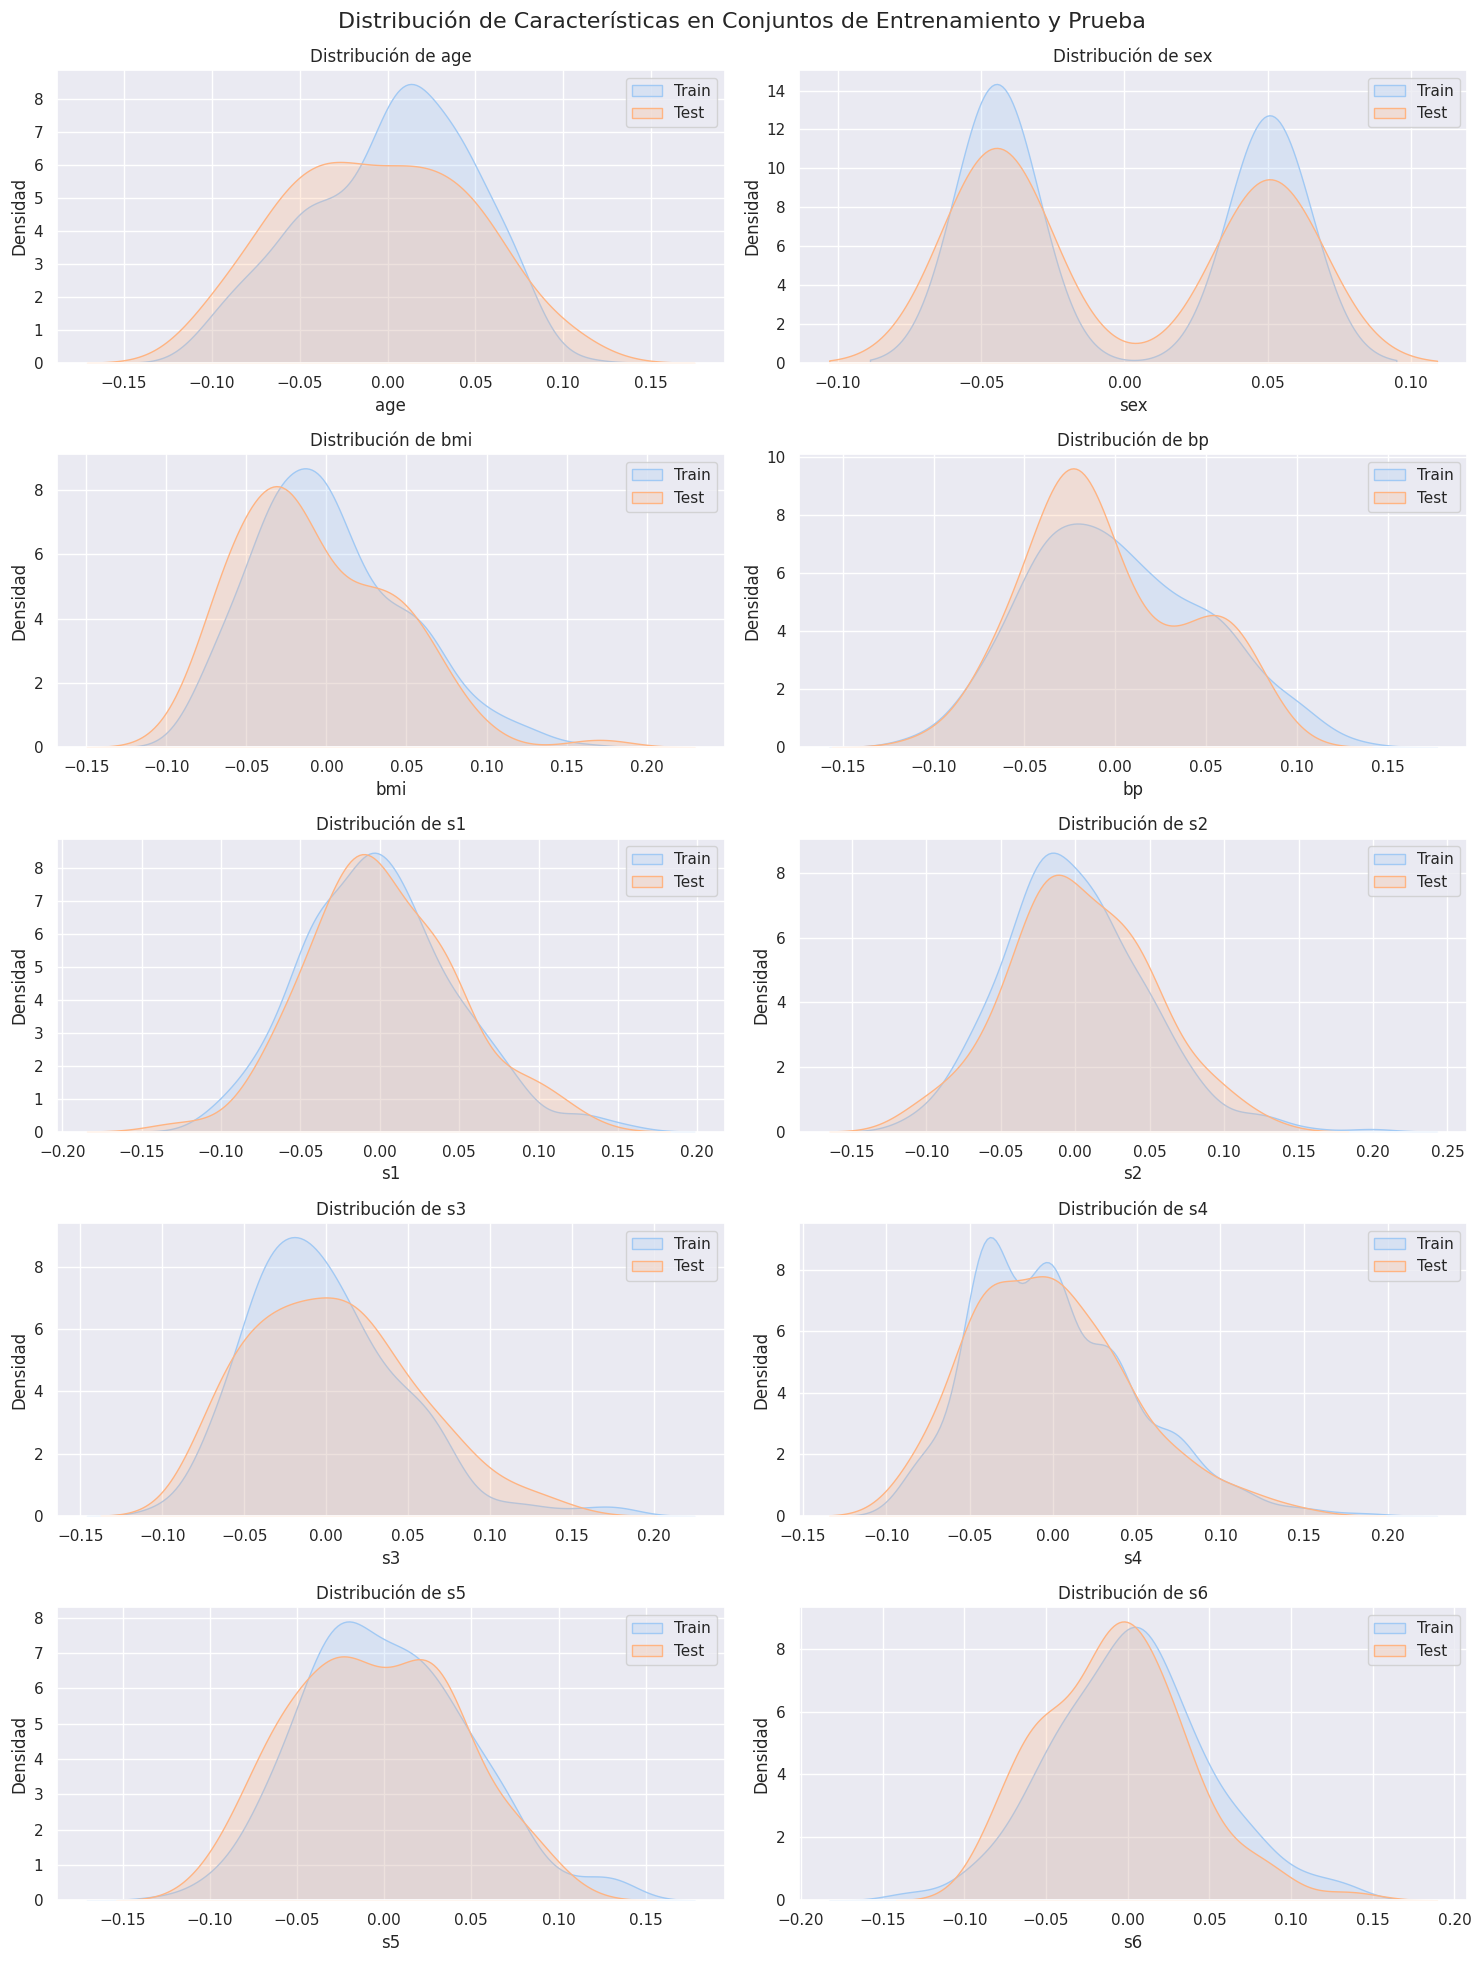

In [22]:
def visualize_train_test_distributions_for_features(X_train, X_test, feature_names):
    """
    Visualiza la distribución de características en los conjuntos de entrenamiento y prueba.

    Args:
    X_train (numpy.ndarray): Conjunto de datos de entrenamiento
    X_test (numpy.ndarray): Conjunto de datos de prueba
    feature_names (list): Lista de nombres de las características
    """
    n_features = X_train.shape[1]
    n_rows = (n_features + 1) // 2  # Calcula el número de filas necesarias

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4*n_rows))
    fig.suptitle('Distribución de Características en Conjuntos de Entrenamiento y Prueba', fontsize=16)

    for i, feature in enumerate(feature_names):
        row = i // 2
        col = i % 2
        ax = axes[row, col] if n_rows > 1 else axes[col]

        sns.kdeplot(X_train[:, i], ax=ax, label='Train', fill=True)
        sns.kdeplot(X_test[:, i], ax=ax, label='Test', fill=True)

        ax.set_title(f'Distribución de {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Densidad')
        ax.legend()

    # Si el número de características es impar, elimina el último subplot vacío
    if n_features % 2 != 0:
        fig.delaxes(axes[-1, -1])

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Ajusta el espacio para el título principal
    plt.show()

visualize_train_test_distributions_for_features(X_train, X_test, feature_names)

🌳 ENTRENANDO MODELO RANDOM FOREST
✅ Modelo entrenado exitosamente
   • Estimadores: 100
   • Características utilizadas: 10
   • Muestras de entrenamiento: 353

🔮 GENERANDO PREDICCIONES
   • Predicciones generadas: 89
   • Muestras de prueba: 89

📊 RESULTADOS DE LA MATRIZ DE CONFUSIÓN:
   • Verdaderos Negativos (TN): 37
   • Falsos Positivos (FP): 12
   • Falsos Negativos (FN): 13
   • Verdaderos Positivos (TP): 27


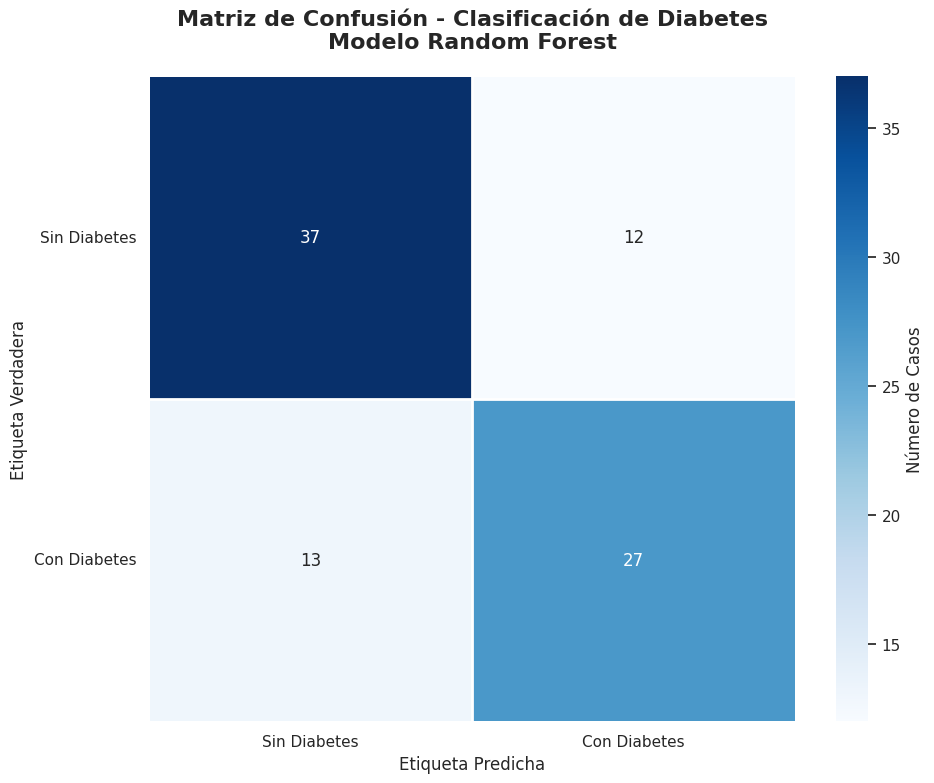


📈 MÉTRICAS DE RENDIMIENTO:
   • Exactitud (Accuracy): 0.719
   • Precisión (Precision): 0.692
   • Sensibilidad (Recall): 0.675
   • F1-Score: 0.684


In [26]:
# Entrenar un modelo de Random Forest
print("🌳 ENTRENANDO MODELO RANDOM FOREST")
print("=" * 40)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

print(f"✅ Modelo entrenado exitosamente")
print(f"   • Estimadores: {rf_model.n_estimators}")
print(f"   • Características utilizadas: {X_train_scaled.shape[1]}")
print(f"   • Muestras de entrenamiento: {X_train_scaled.shape[0]}")

# Realizar predicciones en el conjunto de prueba
print(f"\n🔮 GENERANDO PREDICCIONES")
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"   • Predicciones generadas: {len(y_pred)}")
print(f"   • Muestras de prueba: {len(y_test)}")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar estadísticas básicas de la matriz de confusión
tn, fp, fn, tp = cm.ravel()
print(f"\n📊 RESULTADOS DE LA MATRIZ DE CONFUSIÓN:")
print(f"   • Verdaderos Negativos (TN): {tn}")
print(f"   • Falsos Positivos (FP): {fp}")
print(f"   • Falsos Negativos (FN): {fn}")
print(f"   • Verdaderos Positivos (TP): {tp}")

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))

# Crear heatmap con anotaciones mejoradas
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            square=True, linewidths=0.5,
            cbar_kws={'label': 'Número de Casos'})


# Personalizar el gráfico
plt.title('Matriz de Confusión - Clasificación de Diabetes\nModelo Random Forest',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)

# Configurar etiquetas de los ejes
plt.xticks([0.5, 1.5], ['Sin Diabetes', 'Con Diabetes'], fontsize=11)
plt.yticks([0.5, 1.5], ['Sin Diabetes', 'Con Diabetes'], fontsize=11, rotation=0)

# Añadir líneas divisorias más marcadas
plt.axhline(y=1, color='white', linewidth=2)
plt.axvline(x=1, color='white', linewidth=2)

plt.tight_layout()
plt.show()

# Calcular métricas adicionales
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📈 MÉTRICAS DE RENDIMIENTO:")
print(f"   • Exactitud (Accuracy): {accuracy:.3f}")
print(f"   • Precisión (Precision): {precision:.3f}")
print(f"   • Sensibilidad (Recall): {recall:.3f}")
print(f"   • F1-Score: {f1_score:.3f}")


📋 INFORME DETALLADO DE CLASIFICACIÓN
              precision    recall  f1-score   support

Sin Diabetes      0.740     0.755     0.747        49
Con Diabetes      0.692     0.675     0.684        40

    accuracy                          0.719        89
   macro avg      0.716     0.715     0.716        89
weighted avg      0.719     0.719     0.719        89


📊 GENERANDO CURVA ROC
   • AUC Score: 0.812
   • Puntos en la curva: 42


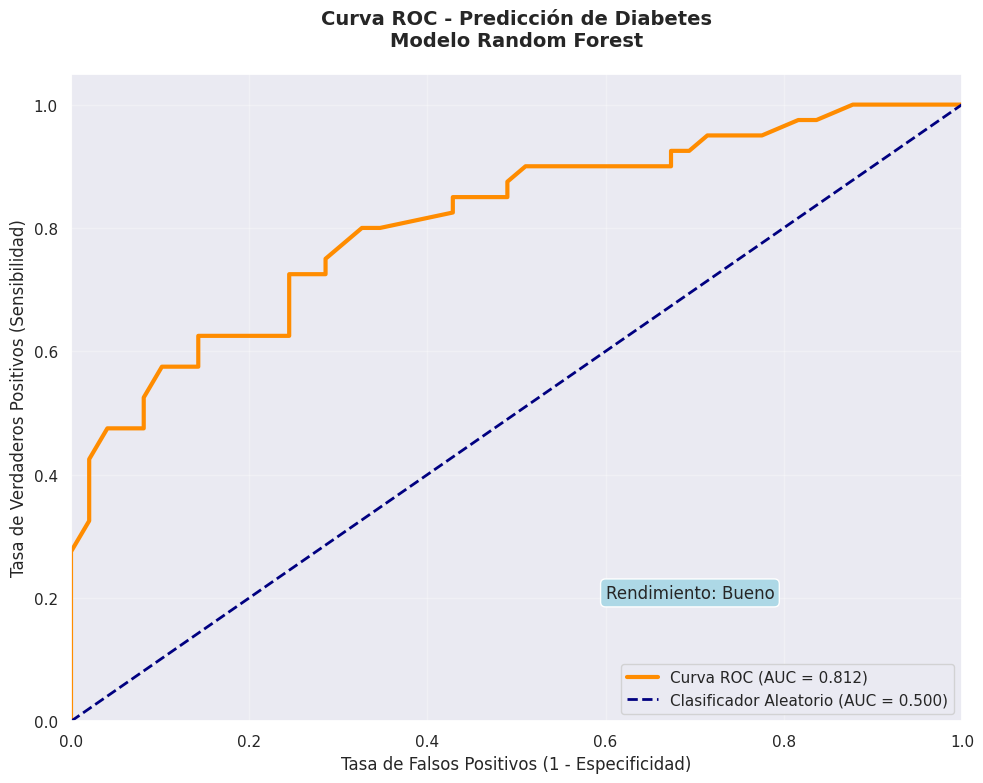

In [28]:
# Imprimir el informe de clasificación
print("📋 INFORME DETALLADO DE CLASIFICACIÓN")
print("=" * 50)
print(classification_report(y_test, y_pred,
                         target_names=['Sin Diabetes', 'Con Diabetes'],
                         digits=3))

# Calcular y visualizar la curva ROC
print("\n📊 GENERANDO CURVA ROC")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"   • AUC Score: {roc_auc:.3f}")
print(f"   • Puntos en la curva: {len(fpr)}")

# Crear gráfico de la curva ROC
plt.figure(figsize=(10, 8))

# Plotear la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=3,
        label=f'Curva ROC (AUC = {roc_auc:.3f})')

# Línea diagonal de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
        label='Clasificador Aleatorio (AUC = 0.500)')

# Configurar límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curva ROC - Predicción de Diabetes\nModelo Random Forest',
         fontsize=14, fontweight='bold', pad=20)

# Personalizar leyenda y grilla
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)


plt.text(0.6, 0.2, f'Rendimiento: {auc_interpretation}',
        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()


In [32]:
# Calcular métricas específicas
print("🔍 CÁLCULO DE MÉTRICAS DE RENDIMIENTO CLÍNICO")
print("=" * 55)

tn, fp, fn, tp = cm.ravel()

# Calcular métricas con manejo de división por cero
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

# Mostrar métricas numéricas
print(f"📊 MÉTRICAS PRINCIPALES:")
print(f"   • Precisión (Precision):     {precision:.3f}")
print(f"   • Sensibilidad (Recall):     {sensitivity:.3f}")
print(f"   • Especificidad:             {specificity:.3f}")
print(f"   • F1-Score:                  {f1_score:.3f}")
print(f"   • AUC-ROC:                   {roc_auc:.3f}")

# Interpretación clínica detallada
print(f"\n🏥 INTERPRETACIÓN CLÍNICA:")
print(f"   • El modelo identifica correctamente el {sensitivity*100:.1f}% de los casos ")
print(f"     positivos de diabetes (sensibilidad).")
print(f"   • De los casos que el modelo predice como diabetes positivo, ")
print(f"     el {precision*100:.1f}% son realmente positivos (precisión).")
print(f"   • El modelo identifica correctamente el {specificity*100:.1f}% de los casos ")
print(f"     negativos de diabetes (especificidad).")
print(f"   • El F1-Score de {f1_score:.3f} indica el balance entre precisión y sensibilidad.")
print(f"   • El AUC-ROC de {roc_auc:.3f} sugiere la capacidad discriminativa del modelo ")
print(f"     para la diabetes.")

# Evaluación del rendimiento clínico
print(f"\n⚕️ EVALUACIÓN DEL RENDIMIENTO CLÍNICO:")

# Evaluar sensibilidad (crítica para diagnóstico médico)
if sensitivity >= 0.9:
   sens_eval = "✅ Excelente - Muy pocos casos positivos sin detectar"
elif sensitivity >= 0.8:
   sens_eval = "🟢 Buena - Detección aceptable de casos positivos"
elif sensitivity >= 0.7:
   sens_eval = "🟡 Moderada - Algunos casos positivos pueden no detectarse"
else:
   sens_eval = "🔴 Baja - Riesgo alto de casos positivos sin diagnosticar"

# Evaluar especificidad (importante para evitar falsos positivos)
if specificity >= 0.9:
   spec_eval = "✅ Excelente - Muy pocos falsos positivos"
elif specificity >= 0.8:
   spec_eval = "🟢 Buena - Falsos positivos controlados"
elif specificity >= 0.7:
   spec_eval = "🟡 Moderada - Algunos falsos positivos"
else:
   spec_eval = "🔴 Baja - Muchos falsos positivos"

print(f"   • Sensibilidad: {sens_eval}")
print(f"   • Especificidad: {spec_eval}")

# Recomendaciones clínicas
print(f"\n💡 RECOMENDACIONES:")
if sensitivity < 0.8:
   print(f"   ⚠️  Considerar ajustar el umbral de decisión para aumentar sensibilidad")
if specificity < 0.8:
   print(f"   ⚠️  Evaluar el costo de falsos positivos en el contexto clínico")
if f1_score < 0.7:
   print(f"   ⚠️  El modelo podría beneficiarse de más datos de entrenamiento")

🔍 CÁLCULO DE MÉTRICAS DE RENDIMIENTO CLÍNICO
📊 MÉTRICAS PRINCIPALES:
   • Precisión (Precision):     0.692
   • Sensibilidad (Recall):     0.675
   • Especificidad:             0.755
   • F1-Score:                  0.684
   • AUC-ROC:                   0.812

🏥 INTERPRETACIÓN CLÍNICA:
   • El modelo identifica correctamente el 67.5% de los casos 
     positivos de diabetes (sensibilidad).
   • De los casos que el modelo predice como diabetes positivo, 
     el 69.2% son realmente positivos (precisión).
   • El modelo identifica correctamente el 75.5% de los casos 
     negativos de diabetes (especificidad).
   • El F1-Score de 0.684 indica el balance entre precisión y sensibilidad.
   • El AUC-ROC de 0.812 sugiere la capacidad discriminativa del modelo 
     para la diabetes.

⚕️ EVALUACIÓN DEL RENDIMIENTO CLÍNICO:
   • Sensibilidad: 🔴 Baja - Riesgo alto de casos positivos sin diagnosticar
   • Especificidad: 🟡 Moderada - Algunos falsos positivos

💡 RECOMENDACIONES:
   ⚠️  Considerar a

---

# Interpretación de los resultados:
* El modelo identifica correctamente el 67.5% de los casos positivos de diabetes (sensibilidad).
* De los casos que el modelo predice como diabetes positivo, el 69.2% son realmente positivos (precisión).
* El modelo identifica correctamente el 75.5% de los casos negativos de diabetes (especificidad).
* El F1-Score de 0.68 indica un balance entre precisión y sensibilidad.
* El AUC-ROC de 0.81 sugiere la capacidad discriminativa del modelo para la diabetes.

## Conclusiones

1. **Rendimiento General**:
   - El modelo muestra un rendimiento moderado en la predicción de diabetes, con un AUC-ROC de 0.81, lo que indica una capacidad discriminativa buena, aunque no excelente.

2. **Balance entre Sensibilidad y Especificidad**:
   - La sensibilidad (67.5%) y la especificidad (75.5%) están relativamente equilibradas, con un ligero sesgo hacia la identificación correcta de casos negativos.
   - Este balance sugiere que el modelo es algo más conservador en la predicción de casos positivos.

3. **F1-Score**:
   - El F1-Score de 0.68 confirma un equilibrio razonable entre precisión y sensibilidad, aunque hay margen de mejora.

## Sugerencias de Mejora (generales)

1. **Ajuste del Umbral de Clasificación**:
   - Experimentar con diferentes umbrales de clasificación para encontrar un mejor balance entre sensibilidad y especificidad, especialmente si se prioriza la detección de casos positivos.

2. **Ingeniería de Características**:
   - Crear nuevas características o transformar las existentes para capturar mejor los patrones predictivos de la diabetes.

3. **Aumento de Datos**:
   - Si el conjunto de datos es pequeño, considerar técnicas de aumento de datos para mejorar la generalización del modelo.

4. **Manejo de Desbalance de Clases**:
   - Si existe un desbalance significativo entre las clases, considerar técnicas como SMOTE para sobremuestrear la clase minoritaria.

5. **Validación Cruzada**:
   - Utilizar validación cruzada para obtener una estimación más robusta del rendimiento del modelo y evitar el sobreajuste.

6. **Incorporación de Conocimiento Médico**:
   - Consultar con expertos en diabetes para incorporar conocimiento domain-specific en la selección y creación de características.

7. **Análisis de Errores**:
   - Realizar un análisis detallado de los casos mal clasificados para identificar patrones o subgrupos donde el modelo tiene un peor desempeño.

8. **Recopilación de Más Datos**:
    - Si es posible, recopilar más datos o incorporar fuentes de datos adicionales para enriquecer el conjunto de entrenamiento.

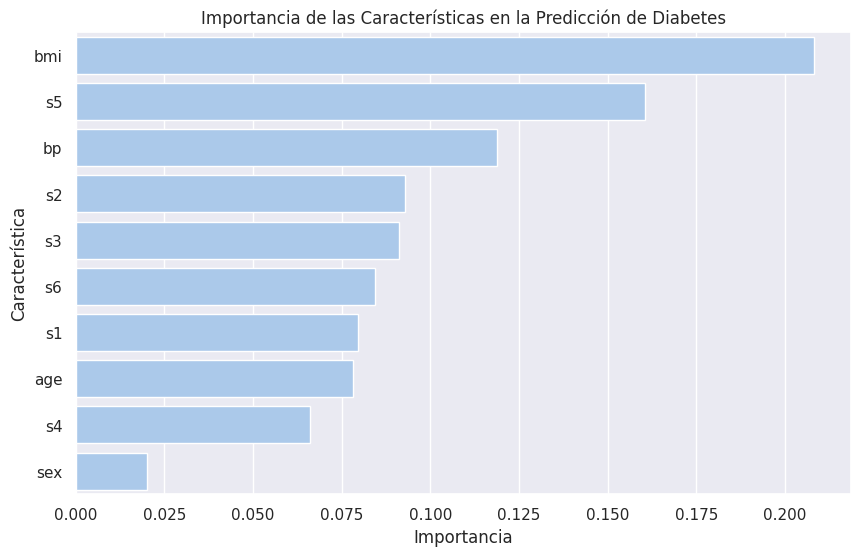


Importancia de las Características:
  feature  importance
2     bmi    0.208086
8      s5    0.160413
3      bp    0.118684
5      s2    0.092859
6      s3    0.091283
9      s6    0.084323
4      s1    0.079738
0     age    0.078318
7      s4    0.066106
1     sex    0.020190


In [ ]:
# Importancia de las características
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las Características en la Predicción de Diabetes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

print("\nImportancia de las Características:")
print(feature_importance)

# Análisis de la Distribución de Probabilidades:
La distribución de probabilidades predichas puede ayudar a entender cómo el modelo está clasificando los casos. Una distribución bimodal podría indicar una buena separación entre clases. Si la distribución está sesgada hacia un extremo, podría ser necesario ajustar el umbral de clasificación.

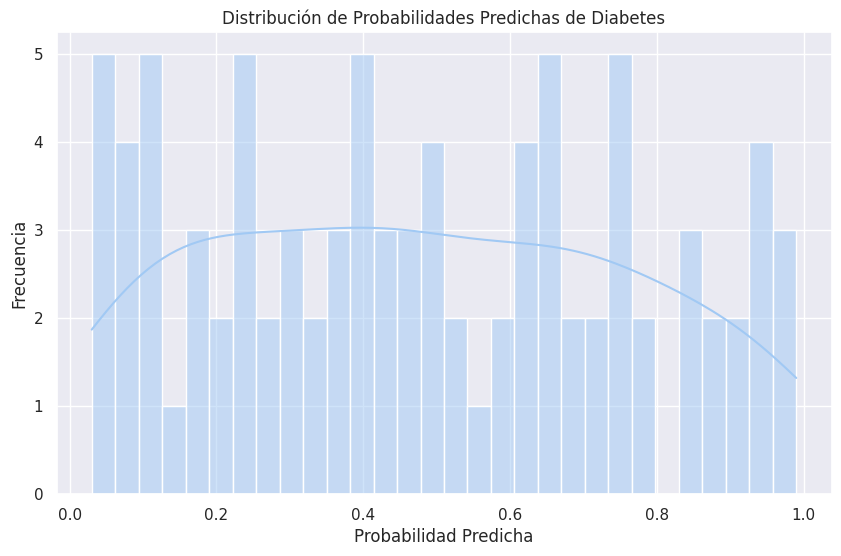

In [ ]:
# Análisis adicional: Distribución de probabilidades predichas
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=30, kde=True)
plt.title('Distribución de Probabilidades Predichas de Diabetes')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.show()

# Comentario final sobre la interpretación en el contexto de diabetes

Interpretación en el Contexto de Diabetes:

- La sensibilidad es crucial para identificar correctamente a los pacientes con riesgo de diabetes.
- La especificidad ayuda a evitar falsos positivos que podrían llevar a pruebas o tratamientos innecesarios.
- El balance entre sensibilidad y especificidad debe ajustarse según las consecuencias de los falsos positivos vs. falsos negativos en el contexto de la diabetes.
- La importancia de las características puede guiar a los médicos sobre qué factores son más relevantes para el riesgo de diabetes, lo que puede ser útil para la prevención y el manejo de la enfermedad.
- Este modelo podría ser útil como una herramienta de screening inicial, pero no debe reemplazar el diagnóstico médico profesional.
- Dada la naturaleza crítica de la detección de diabetes, se podría considerar ajustar el modelo para favorecer una mayor sensibilidad, aceptando un posible aumento en los falsos positivos que pueden ser descartados en exámenes posteriores.

Finalmente: Es crucial validar cualquier mejora del modelo (actualizaciones) con datos de prueba independientes y, en última instancia, en un entorno clínico real antes de su implementación.